In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors
import joblib
# Configure visualization settings
sns.set(style="whitegrid")

Read dataset

In [2]:
df = pd.read_csv('crime_data.csv')
df = df.sample(n=50000, random_state=42)

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
732656,231717642,11/01/2023 12:00:00 AM,09/01/2023 12:00:00 AM,1530,17,Devonshire,1761,2,354,THEFT OF IDENTITY,...,AA,Adult Arrest,354.0,NaN,NaN,NaN,22000 ACORN ST,NaN,34.2464,-118.6091
107475,200312263,06/03/2020 12:00:00 AM,06/02/2020 12:00:00 AM,2230,3,Southwest,361,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AO,Adult Other,626.0,NaN,NaN,NaN,4000 STEVELY AV,NaN,34.0131,-118.3536
250887,211307622,03/24/2021 12:00:00 AM,03/23/2021 12:00:00 AM,2115,13,Newton,1343,2,901,VIOLATION OF RESTRAINING ORDER,...,AO,Adult Other,901.0,NaN,NaN,NaN,1000 E 41ST ST,NaN,34.0092,-118.2581
193497,201411499,05/27/2020 12:00:00 AM,05/27/2020 12:00:00 AM,1400,14,Pacific,1424,1,310,BURGLARY,...,IC,Invest Cont,310.0,998.0,NaN,NaN,3200 KEESHEN DR,NaN,34.0164,-118.4380
693933,231117432,12/31/2023 12:00:00 AM,12/22/2023 12:00:00 AM,1630,11,Northeast,1145,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,2200 GLENDALE BL,NaN,34.1056,-118.2603


In [4]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
357358,210206987,03/16/2021 12:00:00 AM,03/16/2021 12:00:00 AM,1830,2,Rampart,212,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,VERMONT,BEVERLY,34.0763,-118.2917
560814,222016572,11/01/2022 12:00:00 AM,11/01/2022 12:00:00 AM,45,20,Olympic,2076,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,998.0,NaN,NaN,1700 S VERMONT AV,NaN,34.0436,-118.2960
281281,211811993,06/14/2021 12:00:00 AM,06/13/2021 12:00:00 AM,1400,18,Southeast,1802,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,300 W 90TH ST,NaN,33.9551,-118.2782
7314,201212439,05/08/2020 12:00:00 AM,03/12/2020 12:00:00 AM,1000,12,77th Street,1203,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,IC,Invest Cont,845.0,NaN,NaN,NaN,1700 W 45TH ST,NaN,34.0028,-118.3089
378647,211818065,10/06/2021 12:00:00 AM,10/05/2021 12:00:00 AM,1800,18,Southeast,1802,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,9100 S FIGUEROA ST,NaN,33.9535,-118.2827


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 732656 to 378647
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           50000 non-null  int64  
 1   Date Rptd       50000 non-null  object 
 2   DATE OCC        50000 non-null  object 
 3   TIME OCC        50000 non-null  int64  
 4   AREA            50000 non-null  int64  
 5   AREA NAME       50000 non-null  object 
 6   Rpt Dist No     50000 non-null  int64  
 7   Part 1-2        50000 non-null  int64  
 8   Crm Cd          50000 non-null  int64  
 9   Crm Cd Desc     50000 non-null  object 
 10  Mocodes         42782 non-null  object 
 11  Vict Age        50000 non-null  int64  
 12  Vict Sex        43113 non-null  object 
 13  Vict Descent    43112 non-null  object 
 14  Premis Cd       50000 non-null  float64
 15  Premis Desc     49974 non-null  object 
 16  Weapon Used Cd  16866 non-null  float64
 17  Weapon Desc     16866 non-null

In [6]:
# Drop unnecessary columns
columns_to_drop = [
    'DR_NO', 'Date Rptd', 'DATE OCC', 'LOCATION',
    'Cross Street', 'AREA NAME', 'Mocodes', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'
]
df = df.drop(columns=columns_to_drop)

In [7]:
# Fill missing values
df['Vict Sex'] = df['Vict Sex'].fillna('U')
df['Vict Descent'] = df['Vict Descent'].fillna('Unknown')
df['Premis Desc'] = df['Premis Desc'].fillna('Unknown')
df['Weapon Desc'] = df['Weapon Desc'].fillna('No Weapon')

In [8]:
value_counts = df['Crm Cd Desc'].value_counts()
print("Counts of each unique value in 'Crm Cd Desc':")
print(value_counts)
print(len(value_counts))

Counts of each unique value in 'Crm Cd Desc':
Crm Cd Desc
VEHICLE - STOLEN                                            5462
BATTERY - SIMPLE ASSAULT                                    3931
BURGLARY FROM VEHICLE                                       3112
THEFT OF IDENTITY                                           3051
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     2936
                                                            ... 
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM       1
GRAND THEFT / INSURANCE FRAUD                                  1
TILL TAP - PETTY ($950 & UNDER)                                1
INCITING A RIOT                                                1
THEFT, COIN MACHINE - GRAND ($950.01 & OVER)                   1
Name: count, Length: 122, dtype: int64
122


In [9]:
# Reduce the number of unique crime types
top_10_crime_types = df['Crm Cd Desc'].value_counts().nlargest(10).index
df['Crm Cd Desc'] = df['Crm Cd Desc'].apply(lambda x: x if x in top_10_crime_types else 'Others')

In [10]:
# Show basic dataset description
print("Dataset Description:")
df.describe(include='all')


Dataset Description:


,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000,50000,50000.000000,50000,16866.000000,50000,50000,50000,50000.000000,50000.000000
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,5,20,NaN,274,NaN,71,6,6,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Others,NaN,M,H,NaN,STREET,NaN,No Weapon,IC,Invest Cont,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,18829,NaN,20245,14903,NaN,12825,NaN,33134,39922,39922,NaN,NaN
mean,1339.210600,10.747100,1121.003920,1.407760,502.069340,NaN,29.231460,NaN,NaN,305.934500,NaN,364.034626,NaN,NaN,NaN,33.994322,-118.077764
std,650.723753,6.103403,610.583025,0.491423,206.803307,NaN,21.914671,NaN,NaN,218.621625,NaN,123.241327,NaN,NaN,NaN,1.650106,5.719545
min,1.000000,1.000000,101.000000,1.000000,110.000000,NaN,-1.000000,NaN,NaN,101.000000,NaN,101.000000,NaN,NaN,NaN,0.000000,-118.665200
25%,900.000000,6.000000,622.000000,1.000000,331.000000,NaN,0.000000,NaN,NaN,101.000000,NaN,311.000000,NaN,NaN,NaN,34.014200,-118.429900
50%,1420.000000,11.000000,1144.000000,1.000000,442.000000,NaN,30.000000,NaN,NaN,203.000000,NaN,400.000000,NaN,NaN,NaN,34.059400,-118.322400
75%,1900.000000,16.000000,1622.000000,2.000000,626.000000,NaN,44.000000,NaN,NaN,501.000000,NaN,400.000000,NaN,NaN,NaN,34.164500,-118.274000


In [11]:
df.head()

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON
732656,1530,17,1761,2,354,THEFT OF IDENTITY,29,F,W,501.0,SINGLE FAMILY DWELLING,NaN,No Weapon,AA,Adult Arrest,34.2464,-118.6091
107475,2230,3,361,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,17,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,34.0131,-118.3536
250887,2115,13,1343,2,901,Others,27,M,H,101.0,STREET,NaN,No Weapon,AO,Adult Other,34.0092,-118.2581
193497,1400,14,1424,1,310,BURGLARY,84,M,W,501.0,SINGLE FAMILY DWELLING,NaN,No Weapon,IC,Invest Cont,34.0164,-118.4380
693933,1630,11,1145,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,U,Unknown,101.0,STREET,NaN,No Weapon,IC,Invest Cont,34.1056,-118.2603


C:\Users\adith\AppData\Local\Temp\ipykernel_14944\3779119865.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Crm Cd Desc', data=df, order=df['Crm Cd Desc'].value_counts().index, palette='viridis')


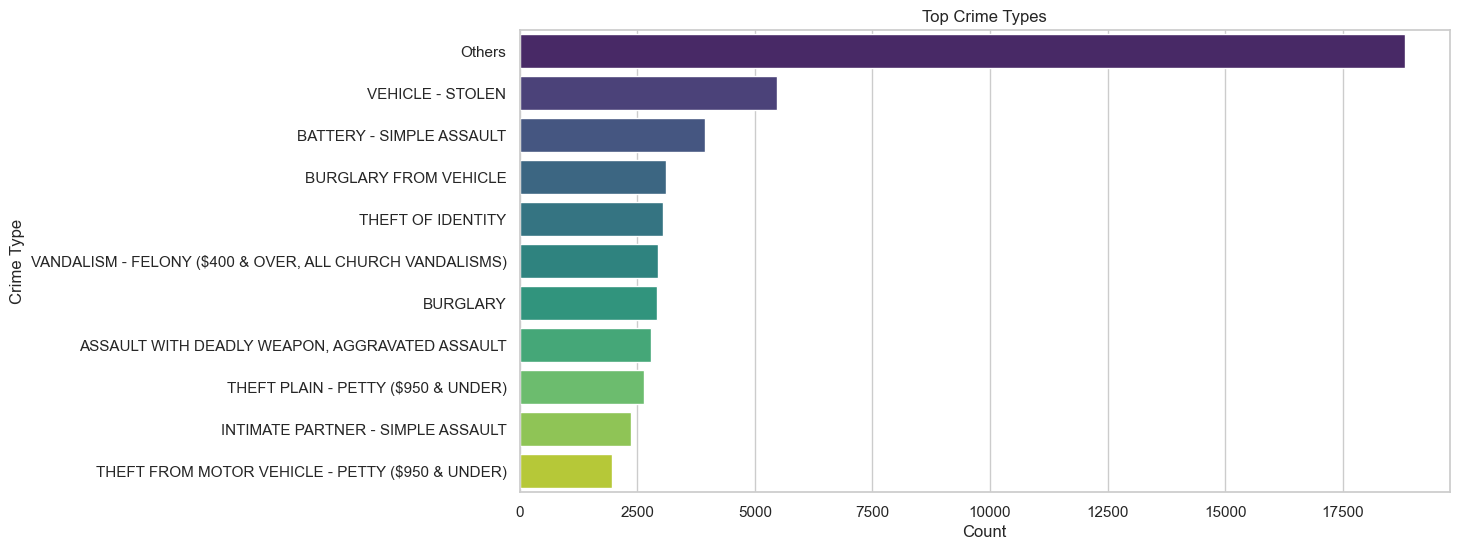

In [12]:
# Visualize distribution of crimes
plt.figure(figsize=(12, 6))
sns.countplot(y='Crm Cd Desc', data=df, order=df['Crm Cd Desc'].value_counts().index, palette='viridis')
plt.title("Top Crime Types")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()


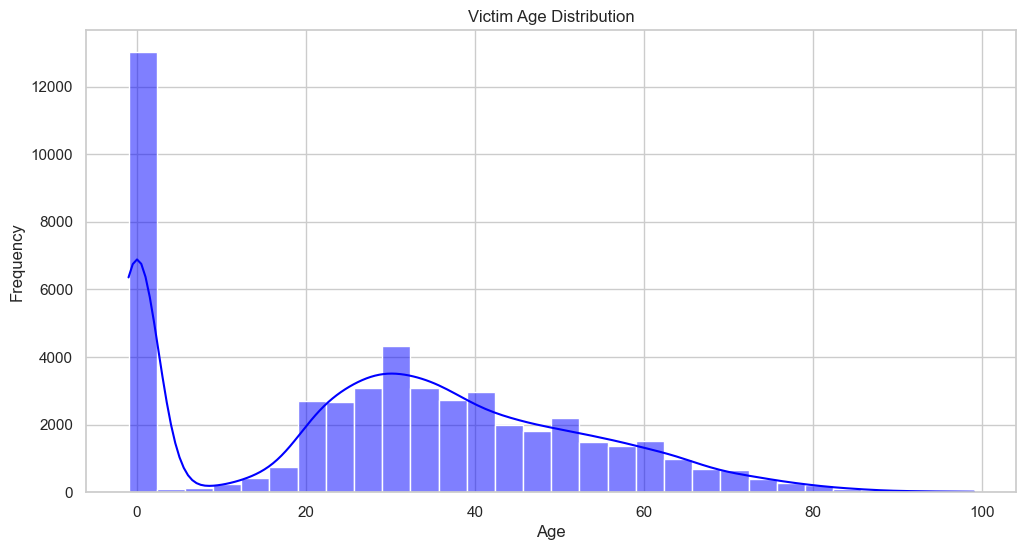

In [13]:
# Visualize victim age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Vict Age'], bins=30, kde=True, color='blue')
plt.title("Victim Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\adith\AppData\Local\Temp\ipykernel_14944\1259810878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AREA', data=df, palette='coolwarm')


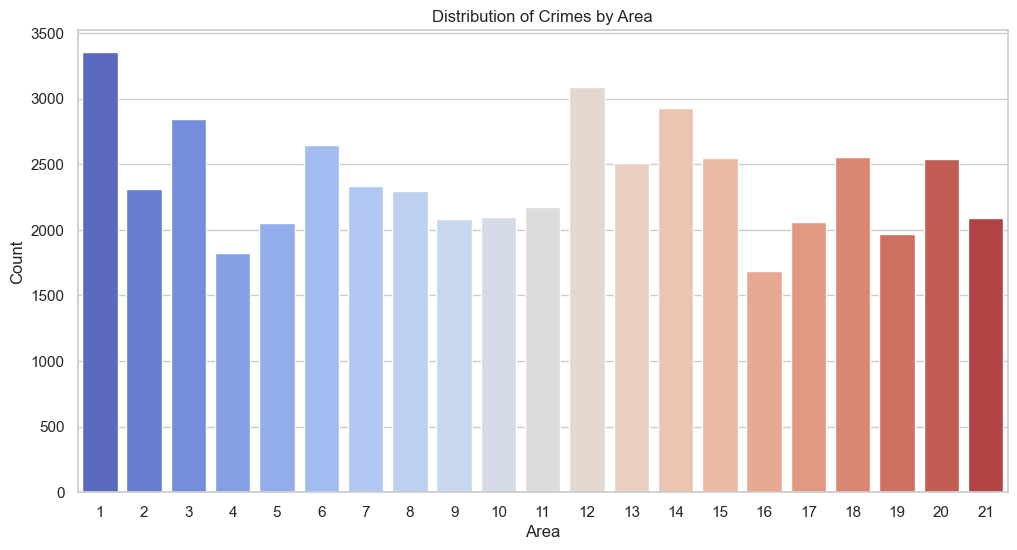

In [14]:
# Visualize distribution of areas
plt.figure(figsize=(12, 6))
sns.countplot(x='AREA', data=df, palette='coolwarm')
plt.title("Distribution of Crimes by Area")
plt.xlabel("Area")
plt.ylabel("Count")
plt.show()

In [15]:
#label encorders
label_encoders = {}
scaler = StandardScaler()

In [16]:
# Encode categorical features
#converts coategorical variables into numerical values
# This is important for machine learning algorithms that require numerical input.
categorical_columns = ['Crm Cd Desc', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
# Fill missing values in numerical features
df['Vict Age'] = df['Vict Age'].fillna(-1)
df['Premis Cd'] = df['Premis Cd'].fillna(-1)
df['Weapon Used Cd'] = df['Weapon Used Cd'].fillna(-1)
df['LAT'] = df['LAT'].fillna(0)
df['LON'] = df['LON'].fillna(0)

In [18]:
#this is to ensure that the model can handle missing values appropriately.
# Select and scale numeric features
features = ['TIME OCC', 'AREA', 'Rpt Dist No', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'LAT', 'LON']
X = df[features]
X_scaled = scaler.fit_transform(X)

In [19]:
X

,TIME OCC,AREA,Rpt Dist No,Vict Age,Premis Cd,Weapon Used Cd,LAT,LON
732656,1530,17,1761,29,501.0,-1.0,34.2464,-118.6091
107475,2230,3,361,17,502.0,400.0,34.0131,-118.3536
250887,2115,13,1343,27,101.0,-1.0,34.0092,-118.2581
193497,1400,14,1424,84,501.0,-1.0,34.0164,-118.4380
693933,1630,11,1145,0,101.0,-1.0,34.1056,-118.2603
...,...,...,...,...,...,...,...,...
357358,1830,2,212,22,906.0,500.0,34.0763,-118.2917
560814,45,20,2076,0,108.0,106.0,34.0436,-118.2960
281281,1400,18,1802,53,502.0,-1.0,33.9551,-118.2782
7314,1000,12,1203,0,726.0,-1.0,34.0028,-118.3089


In [20]:
nn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
nn_model.fit(X_scaled)

NearestNeighbors(metric='euclidean')

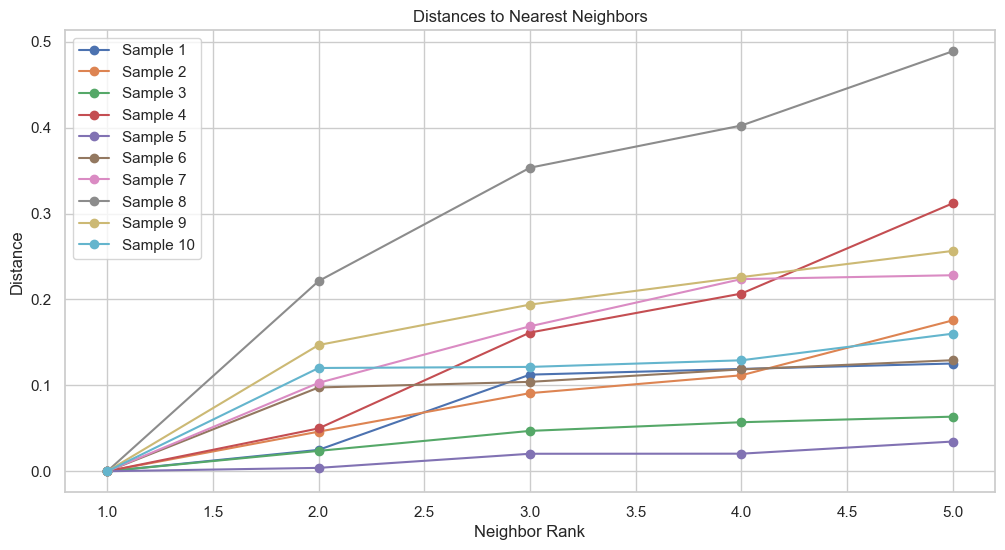

In [21]:
# Visualize distances to nearest neighbors for a sample point
distances, indices = nn_model.kneighbors(X_scaled[:10])
plt.figure(figsize=(12, 6))
for i in range(len(distances)):
    plt.plot(range(1, 6), distances[i], marker='o', label=f'Sample {i + 1}')
plt.title("Distances to Nearest Neighbors")
plt.xlabel("Neighbor Rank")
plt.ylabel("Distance")
plt.legend()
plt.show()

In [22]:
# Save the model and encoders and used to predict new data
joblib.dump(nn_model, 'nn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [23]:
# Load the model and encoders for future use
nn_model = joblib.load('nn_model.pkl')
scaler = joblib.load('scaler.pkl')
label_encoders = joblib.load('label_encoders.pkl')

In [24]:
# Example input
new_crime = {
    'TIME OCC': 1200,
    'AREA': 1,
    'Rpt Dist No': 101,
    'Vict Age': 30,
    'Premis Cd': 102,
    'Weapon Used Cd': 0,
    'LAT': 34.0,
    'LON': -118.0
}

In [25]:
# Predict similar crimes based on new input and decode the results
features = ['TIME OCC', 'AREA', 'Rpt Dist No', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'LAT', 'LON']
new_crime_df = pd.DataFrame([new_crime])
new_crime_scaled = scaler.transform(new_crime_df)

In [26]:
# Find neighbors
distances, indices = nn_model.kneighbors(new_crime_scaled)
similar_crimes = df.iloc[indices[0]].copy()

In [27]:
# Decode categorical columns
categorical_columns = ['Crm Cd Desc', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc']
for col in categorical_columns:
    similar_crimes[col] = label_encoders[col].inverse_transform(similar_crimes[col])

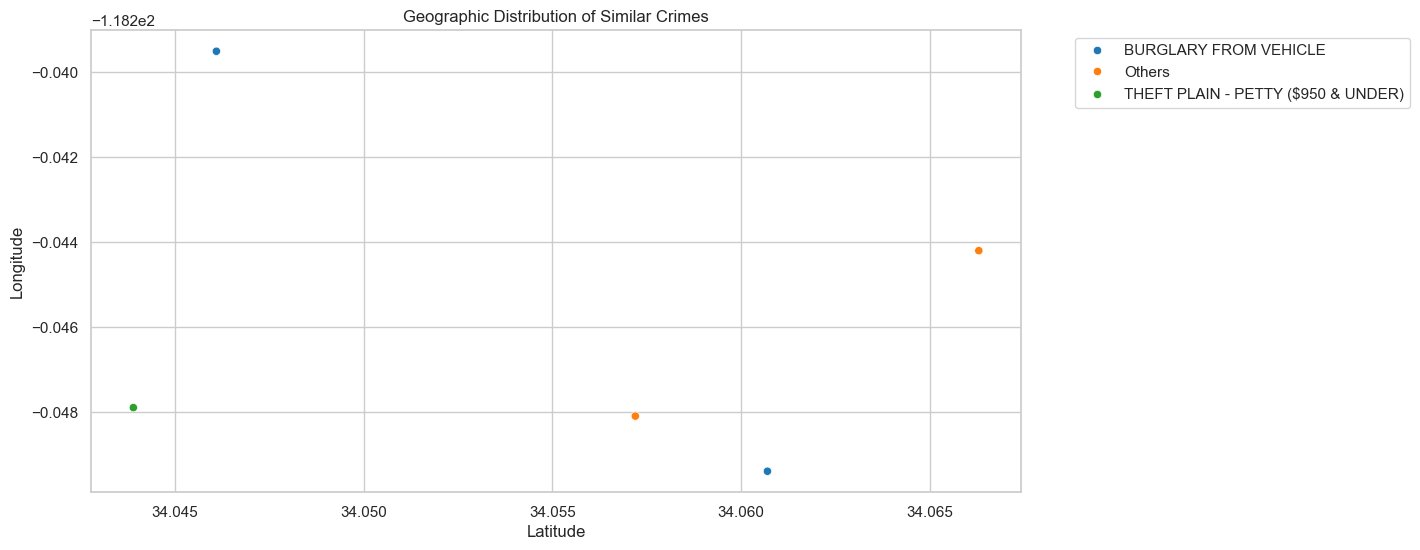

In [28]:
# Visualize similar crimes
plt.figure(figsize=(12, 6))
sns.scatterplot(x=similar_crimes['LAT'], y=similar_crimes['LON'], hue=similar_crimes['Crm Cd Desc'], palette='tab10')
plt.title("Geographic Distribution of Similar Crimes")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
similar_crimes.head()

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON
697042,1210,1,138,1,330,BURGLARY FROM VEHICLE,30,M,W,101.0,STREET,-1.0,No Weapon,IC,Invest Cont,34.0461,-118.2395
968463,1230,1,122,2,901,Others,31,F,H,102.0,SIDEWALK,-1.0,No Weapon,AO,Adult Other,34.0572,-118.2481
253275,1200,1,121,1,330,BURGLARY FROM VEHICLE,28,M,C,101.0,STREET,-1.0,No Weapon,IC,Invest Cont,34.0607,-118.2494
500751,1145,1,155,1,440,THEFT PLAIN - PETTY ($950 & UNDER),29,M,B,102.0,SIDEWALK,-1.0,No Weapon,IC,Invest Cont,34.0439,-118.2479
253117,1300,1,101,1,331,Others,30,F,W,101.0,STREET,-1.0,No Weapon,IC,Invest Cont,34.0663,-118.2442
